# Enunciado:

La agrupación de tarjetas de crédito significa agrupar a los titulares de tarjetas de crédito en función de sus hábitos de compra, límites de crédito y muchos más factores financieros. También se conoce como segmentación de tarjetas de crédito. Dicho análisis de agrupamiento ayuda a las empresas a encontrar a sus clientes potenciales y muchas más estrategias de marketing.

Para la tarea de agrupación de tarjetas de crédito con Machine Learning, necesitamos tener un conjunto de datos basado en el historial de compras de los titulares de tarjetas de crédito. 

Realiza un análisis cluster de los datos que puedes descargar desde aquí.

In [95]:
import pandas as pd
import numpy as np

df = pd.read_csv('csv/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [97]:
X = df.drop('CUST_ID', axis=1)
y = df['CUST_ID']

In [98]:
# Valores nulos
X.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [99]:
# Rellenamos los valores nulos con la media
X.fillna(X.mean(), inplace=True)

## Número óptimo de clusters

In [100]:
X = X.values.copy() # Convertimos a matriz

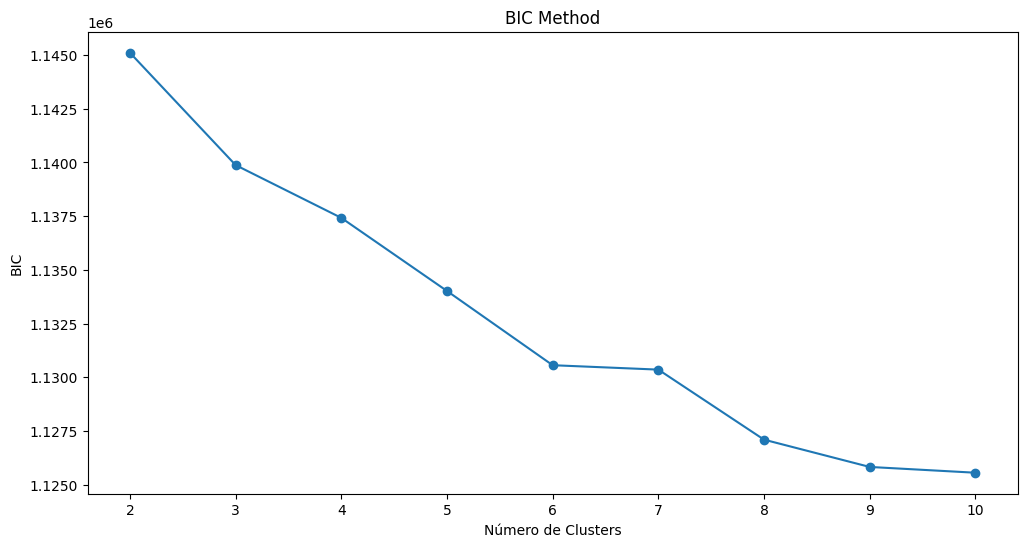

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


def BIC(K, grupos, X):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = X.shape[0]  # Número de datos
  P = X.shape[1]  # Número de variables
  xi = np.zeros((1, K))  # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(X[:, j]))
      sigma_j = np.square(np.std(X[grupos == k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos == k)  # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

# Calcular BIC para diferentes valores de k
bic = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  grupos = kmeans.fit_predict(X)
  bic.append(BIC(k, grupos, X))

plt.figure(figsize=(12, 6))

plt.plot(range(2, 11), bic, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')
plt.title('BIC Method')

plt.show()

In [102]:
# Número óptimo de clusters
n_clusters = 6

In [103]:
# Aplicamos KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=n_clusters, n_init=10) # Inicializamos KMeans
pred = kmeans.fit_predict(X) # Ajustamos el modelo y predecimos los clusters
pca = PCA(n_components=2) # PCA es un método de reducción de dimensionalidad
X_pca = pca.fit_transform(X) # Ajustamos el modelo y transformamos los datos

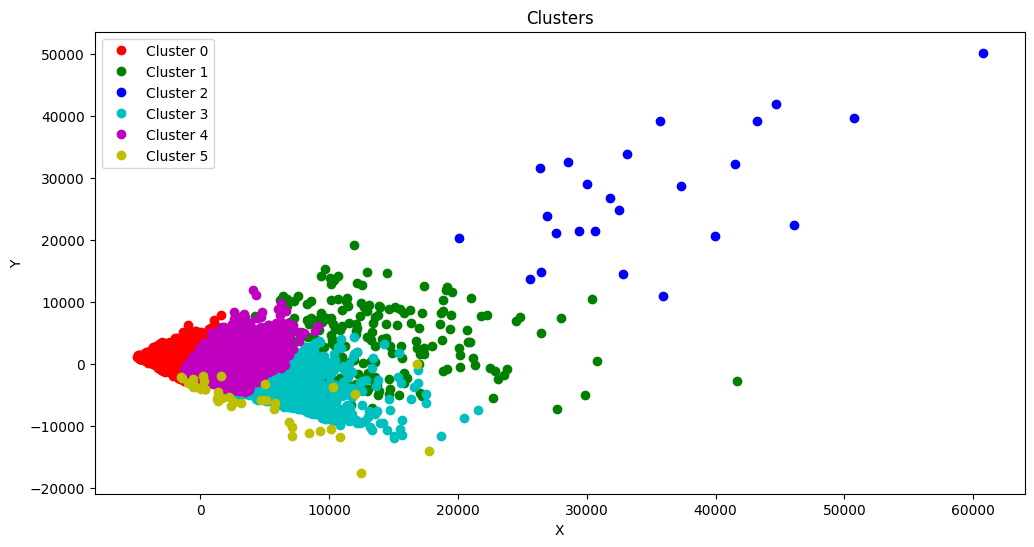

In [104]:
# Graficamos los clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y']
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.plot(X_pca[pred == i, 0], X_pca[pred == i, 1], colors[i]+'o', label=f"Cluster {i}")
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()